In [2]:
import pandas as pd

In [ ]:
#lectura del archivo CSV, dataset

df = pd.read_csv('Accidentalidad_Vial_Municipio_de_Candelaria__Valle._20250618.csv')

In [4]:
df.head()

,CLASE DE ACCIDENTE,GRAVEDAD,VIAS,CORREGIMIENTO,DÍA SEMANA,FECHA DE OCURRECIA,HORA OCURRENCIA
0,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,VIERNES,2021-01-01,1:40:00 AM
1,CHOQUE,MUERTOS,CALI-CANDELARIA,JUANCHITO,VIERNES,2021-01-01,3:00:00 PM
2,CHOQUE,DAÑOS,CALI-CANDELARIA,JUANCHITO,DOMINGO,2021-01-03,5:08:00 PM
3,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,DOMINGO,2021-01-03,12:45:00 PM
4,CHOQUE,DAÑOS,CALI-CANDELARIA,EL CARMELO,DOMINGO,2021-01-03,7:00:00 AM


In [5]:
#nos da la informacion sobre el dataset leido
df.info()
#variables categóricas son de tipo object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CLASE DE ACCIDENTE  1001 non-null   object
 1   GRAVEDAD            1004 non-null   object
 2   VIAS                1004 non-null   object
 3   CORREGIMIENTO       1004 non-null   object
 4   DÍA SEMANA          991 non-null    object
 5   FECHA DE OCURRECIA  1004 non-null   object
 6   HORA OCURRENCIA     991 non-null    object
dtypes: object(7)
memory usage: 55.0+ KB


In [157]:
#detectar valores vacios o nulos
df.isnull().sum()

CLASE DE ACCIDENTE     3
GRAVEDAD               0
VIAS                   0
CORREGIMIENTO          0
DÍA SEMANA            13
FECHA DE OCURRECIA     0
HORA OCURRENCIA       13
dtype: int64

In [6]:
# contar registros duplicados
num_duplicados = df.duplicated().sum()

print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 3


In [7]:
# elimincaion de datos duplicados

df=df.drop_duplicates()

In [8]:
#consulto de nuevo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CLASE DE ACCIDENTE  998 non-null    object
 1   GRAVEDAD            1001 non-null   object
 2   VIAS                1001 non-null   object
 3   CORREGIMIENTO       1001 non-null   object
 4   DÍA SEMANA          988 non-null    object
 5   FECHA DE OCURRECIA  1001 non-null   object
 6   HORA OCURRENCIA     988 non-null    object
dtypes: object(7)
memory usage: 62.6+ KB


In [9]:
#detectar valores vacios o nulos
df.isnull().sum()

CLASE DE ACCIDENTE     3
GRAVEDAD               0
VIAS                   0
CORREGIMIENTO          0
DÍA SEMANA            13
FECHA DE OCURRECIA     0
HORA OCURRENCIA       13
dtype: int64

In [10]:
# Diccionario para traducir los días al español
dias_es = {
    'Monday': 'LUNES',
    'Tuesday': 'MARTES',
    'Wednesday': 'MIERCOLES',
    'Thursday': 'JUEVES',
    'Friday': 'VIERNES',
    'Saturday': 'SABADO',
    'Sunday': 'DOMINGO'
}

# nos aseguramos de que la columna esté en formato fecha
df['FECHA DE OCURRECIA'] = pd.to_datetime(df['FECHA DE OCURRECIA'], errors='coerce')

# Extraer día en inglés y traducirlo al español
dias_en = df['FECHA DE OCURRECIA'].dt.day_name()
dias_traducidos = dias_en.map(dias_es)

# Rellenar los valores nulos en "DÍA SEMANA"
df['DÍA SEMANA'] = df['DÍA SEMANA'].fillna(dias_traducidos)

In [11]:
#detectar valores vacios o nulos
df.isnull().sum()

CLASE DE ACCIDENTE     3
GRAVEDAD               0
VIAS                   0
CORREGIMIENTO          0
DÍA SEMANA             0
FECHA DE OCURRECIA     1
HORA OCURRENCIA       13
dtype: int64

In [12]:
# Rellenar la fecha nula con '2022-05-17'
df['FECHA DE OCURRECIA'].fillna(pd.to_datetime('2022-05-17'), inplace=True)

C:\Users\Katerine\AppData\Local\Temp\ipykernel_6980\3962197913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FECHA DE OCURRECIA'].fillna(pd.to_datetime('2022-05-17'), inplace=True)


In [13]:
#detectar valores vacios o nulos
df.isnull().sum()

CLASE DE ACCIDENTE     3
GRAVEDAD               0
VIAS                   0
CORREGIMIENTO          0
DÍA SEMANA             0
FECHA DE OCURRECIA     0
HORA OCURRENCIA       13
dtype: int64

In [14]:
#rellenar valor clase de accidente
df['CLASE DE ACCIDENTE'].fillna('Desconocido', inplace=True)

C:\Users\Katerine\AppData\Local\Temp\ipykernel_6980\1981894131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CLASE DE ACCIDENTE'].fillna('Desconocido', inplace=True)


In [15]:
#detectar valores vacios o nulos
df.isnull().sum()

CLASE DE ACCIDENTE     0
GRAVEDAD               0
VIAS                   0
CORREGIMIENTO          0
DÍA SEMANA             0
FECHA DE OCURRECIA     0
HORA OCURRENCIA       13
dtype: int64

In [16]:
#consulto de nuevo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CLASE DE ACCIDENTE  1001 non-null   object        
 1   GRAVEDAD            1001 non-null   object        
 2   VIAS                1001 non-null   object        
 3   CORREGIMIENTO       1001 non-null   object        
 4   DÍA SEMANA          1001 non-null   object        
 5   FECHA DE OCURRECIA  1001 non-null   datetime64[ns]
 6   HORA OCURRENCIA     988 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 62.6+ KB


In [17]:
#Vamos a llenar los valores vacios de hora de ocurrencia con desconocido

df['HORA OCURRENCIA'].fillna('Desconocida', inplace=True)

C:\Users\Katerine\AppData\Local\Temp\ipykernel_6980\1806016207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HORA OCURRENCIA'].fillna('Desconocida', inplace=True)


In [18]:
# ELIMINAR FECHA 1989, 10/12/2002, 11/10/2011
df = df[df['FECHA DE OCURRECIA'] != '2002-12-10']
df = df[df['FECHA DE OCURRECIA'] != '2011-10-11']
df = df[df['FECHA DE OCURRECIA'] != '1989-10-17']

In [19]:
#consulto de nuevo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CLASE DE ACCIDENTE  998 non-null    object        
 1   GRAVEDAD            998 non-null    object        
 2   VIAS                998 non-null    object        
 3   CORREGIMIENTO       998 non-null    object        
 4   DÍA SEMANA          998 non-null    object        
 5   FECHA DE OCURRECIA  998 non-null    datetime64[ns]
 6   HORA OCURRENCIA     998 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 62.4+ KB


In [209]:
#consulto de nuevo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1003
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLASE_DE_ACCIDENTE   998 non-null    object        
 1   GRAVEDAD             998 non-null    object        
 2   VIAS                 998 non-null    object        
 3   CORREGIMIENTO        998 non-null    object        
 4   DÍA_SEMANA           998 non-null    object        
 5   FECHA_DE_OCURRENCIA  998 non-null    datetime64[ns]
 6   TIPO_DIA             998 non-null    object        
 7   HORA_OCURRENCIA      985 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 70.2+ KB


In [174]:
df.to_csv('Accidentalidad_candelaria.csv', index=False, encoding='utf-8')

In [20]:
df.head()

,CLASE DE ACCIDENTE,GRAVEDAD,VIAS,CORREGIMIENTO,DÍA SEMANA,FECHA DE OCURRECIA,HORA OCURRENCIA
0,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,VIERNES,2021-01-01,1:40:00 AM
1,CHOQUE,MUERTOS,CALI-CANDELARIA,JUANCHITO,VIERNES,2021-01-01,3:00:00 PM
2,CHOQUE,DAÑOS,CALI-CANDELARIA,JUANCHITO,DOMINGO,2021-01-03,5:08:00 PM
3,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,DOMINGO,2021-01-03,12:45:00 PM
4,CHOQUE,DAÑOS,CALI-CANDELARIA,EL CARMELO,DOMINGO,2021-01-03,7:00:00 AM


In [176]:
# corregimientos con mayor accidenalidad
conteo_corregimientos = df['CORREGIMIENTO'].value_counts()
print(conteo_corregimientos)

CORREGIMIENTO
JUANCHITO              265
CANDELARIA             223
VILLAGORGONA           134
EL CARMELO              96
EL CABUYAL              63
EL LAURO                50
POBLADO CAMPESTRE       49
LA REGINA               24
EL ARENAL               19
DOMINGO LARGO           14
EL CRUCERO              12
CABECERA-CANDELARIA     10
SAN JOAQUIN              7
RIO EL TRIUNFO           3
PROVENZA                 3
EL TIPLE                 3
LA COLOMBIANA            3
TURIN                    3
PARRAGA                  3
EL UVAL                  2
LA NUBIA                 2
LA VICTORIA              2
LA ARGENTINA             1
ING. MAYAGUEZ            1
PUEBLITO VIEJO           1
LA GLORIA                1
PUERTA AMARILLA          1
LA ALIANZA               1
BUCHITOLO                1
SAN JUAN                 1
ZAINERAS                 1
EL TRIUNFO               1
Name: count, dtype: int64


In [177]:
# cantidad de accidentes  y gravedad por corregimiento
tabla_relacion = pd.crosstab(df['CORREGIMIENTO'], df['GRAVEDAD'])
print(tabla_relacion)

GRAVEDAD             DAÑOS  HERIDOS  MUERTOS
CORREGIMIENTO                               
BUCHITOLO                0        1        0
CABECERA-CANDELARIA      0       10        0
CANDELARIA             101      107       15
DOMINGO LARGO            5        9        0
EL ARENAL                2       10        7
EL CABUYAL              23       29       11
EL CARMELO              23       60       13
EL CRUCERO               0       11        1
EL LAURO                22       22        6
EL TIPLE                 1        2        0
EL TRIUNFO               0        1        0
EL UVAL                  1        0        1
ING. MAYAGUEZ            0        1        0
JUANCHITO              106      146       13
LA ALIANZA               0        1        0
LA ARGENTINA             0        0        1
LA COLOMBIANA            0        3        0
LA GLORIA                0        1        0
LA NUBIA                 2        0        0
LA REGINA                9       11        4
LA VICTORI

In [178]:
# via mas peligrosa o con mas accidentes
accidentes_por_via = df['VIAS'].value_counts()
print(accidentes_por_via)

VIAS
CALI-CANDELARIA             445
VILLARICA-PALMIRA           145
CANDELARIA-CALI              98
CANDELARIA                   68
CALI-FLORIDA                 47
                           ... 
CARRERA 36 CON CALLE 16C      1
CARRERA 10                    1
EL CARMELO - TIPLE            1
CARRERA 35D CON CALLE 14      1
CALLE 17 CR 12A               1
Name: count, Length: 69, dtype: int64


In [21]:
# Contar accidentes por día de la semana
accidentes_por_dia = df['DÍA SEMANA'].value_counts().reset_index()

# Cambiar nombres de columnas para que sea una tabla clara
accidentes_por_dia.columns = ['DÍA SEMANA', 'Cantidad de accidentes']

# Ordenar la tabla por cantidad de accidentes descendente
accidentes_por_dia = accidentes_por_dia.sort_values(by='Cantidad de accidentes', ascending=False)

print(accidentes_por_dia)

  DÍA SEMANA  Cantidad de accidentes
0  MIERCOLES                     168
1    DOMINGO                     163
2     MARTES                     147
3    VIERNES                     138
4      LUNES                     133
5     SABADO                     129
6     JUEVES                     120


In [22]:
# Definir días de fin de semana
fines_de_semana = ['SABADO', 'DOMINGO']

# Crear una nueva columna para indicar si es fin de semana o entre semana
df['TIPO_DIA'] = df['DÍA SEMANA'].apply(lambda x: 'Fin de semana' if x in fines_de_semana else 'Entre semana')

# Contar accidentes según tipo de día
accidentes_por_tipo_dia = df['TIPO_DIA'].value_counts().reset_index()
accidentes_por_tipo_dia.columns = ['Tipo de día', 'Cantidad de accidentes']

print(accidentes_por_tipo_dia)


     Tipo de día  Cantidad de accidentes
0   Entre semana                     706
1  Fin de semana                     292


In [23]:
df.head()

,CLASE DE ACCIDENTE,GRAVEDAD,VIAS,CORREGIMIENTO,DÍA SEMANA,FECHA DE OCURRECIA,HORA OCURRENCIA,TIPO_DIA
0,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,VIERNES,2021-01-01,1:40:00 AM,Entre semana
1,CHOQUE,MUERTOS,CALI-CANDELARIA,JUANCHITO,VIERNES,2021-01-01,3:00:00 PM,Entre semana
2,CHOQUE,DAÑOS,CALI-CANDELARIA,JUANCHITO,DOMINGO,2021-01-03,5:08:00 PM,Fin de semana
3,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,DOMINGO,2021-01-03,12:45:00 PM,Fin de semana
4,CHOQUE,DAÑOS,CALI-CANDELARIA,EL CARMELO,DOMINGO,2021-01-03,7:00:00 AM,Fin de semana


In [24]:
import pandas as pd
from datetime import datetime, timedelta

# 1. Separar hora y AM/PM (acepta 1 o 2 dígitos de hora)
df[['SOLO_HORA', 'TURNO']] = df['HORA OCURRENCIA'].str.extract(r'(\d{1,2}:\d{2}:\d{2})\s*(AM|PM)', expand=True)

# 2. Función segura para convertir a hora militar
def convertir_a_militar(hora_str, turno):
    if pd.isna(hora_str) or pd.isna(turno):
        return None  # o puedes usar '00:00:00' si prefieres
    hora_dt = datetime.strptime(str(hora_str), '%I:%M:%S')
    if turno == 'PM' and hora_dt.hour != 12:
        hora_dt += timedelta(hours=12)
    elif turno == 'AM' and hora_dt.hour == 12:
        hora_dt -= timedelta(hours=12)
    return hora_dt.strftime('%H:%M:%S')

# 3. Aplicar función fila por fila
df['HORA_MILITAR'] = df.apply(lambda row: convertir_a_militar(row['SOLO_HORA'], row['TURNO']), axis=1)


In [25]:
df.drop(columns=['HORA OCURRENCIA','TURNO','SOLO_HORA'], inplace=True)

In [26]:
df.head(20)


,CLASE DE ACCIDENTE,GRAVEDAD,VIAS,CORREGIMIENTO,DÍA SEMANA,FECHA DE OCURRECIA,TIPO_DIA,HORA_MILITAR
0,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,VIERNES,2021-01-01,Entre semana,01:40:00
1,CHOQUE,MUERTOS,CALI-CANDELARIA,JUANCHITO,VIERNES,2021-01-01,Entre semana,15:00:00
2,CHOQUE,DAÑOS,CALI-CANDELARIA,JUANCHITO,DOMINGO,2021-01-03,Fin de semana,17:08:00
3,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,DOMINGO,2021-01-03,Fin de semana,12:45:00
4,CHOQUE,DAÑOS,CALI-CANDELARIA,EL CARMELO,DOMINGO,2021-01-03,Fin de semana,07:00:00
5,CHOQUE,HERIDOS,VILLARICA-PALMIRA,EL LAURO,LUNES,2021-01-04,Entre semana,11:20:00
6,CHOQUE,DAÑOS,CALI-CANDELARIA,LA REGINA,MARTES,2021-01-05,Entre semana,20:10:00
7,CHOQUE,HERIDOS,CALI-CANDELARIA,CANDELARIA,MIERCOLES,2021-01-06,Entre semana,14:50:00
8,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,JUEVES,2021-01-07,Entre semana,15:00:00
9,CHOQUE,HERIDOS,CALI-CANDELARIA,EL CARMELO,JUEVES,2021-01-07,Entre semana,15:50:00


In [27]:
df.rename(columns={'HORA_MILITAR': 'HORA_OCURRENCIA'}, inplace=True)
df.rename(columns={'DÍA SEMANA': 'DÍA_SEMANA'}, inplace=True)
df.rename(columns={'FECHA DE OCURRECIA': 'FECHA_DE_OCURRENCIA'}, inplace=True)
df.rename(columns={'CLASE DE ACCIDENTE': 'CLASE_DE_ACCIDENTE'}, inplace=True)

In [28]:
df.head()

,CLASE_DE_ACCIDENTE,GRAVEDAD,VIAS,CORREGIMIENTO,DÍA_SEMANA,FECHA_DE_OCURRENCIA,TIPO_DIA,HORA_OCURRENCIA
0,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,VIERNES,2021-01-01,Entre semana,01:40:00
1,CHOQUE,MUERTOS,CALI-CANDELARIA,JUANCHITO,VIERNES,2021-01-01,Entre semana,15:00:00
2,CHOQUE,DAÑOS,CALI-CANDELARIA,JUANCHITO,DOMINGO,2021-01-03,Fin de semana,17:08:00
3,CHOQUE,DAÑOS,CALI-CANDELARIA,VILLAGORGONA,DOMINGO,2021-01-03,Fin de semana,12:45:00
4,CHOQUE,DAÑOS,CALI-CANDELARIA,EL CARMELO,DOMINGO,2021-01-03,Fin de semana,07:00:00


In [29]:
#nos da la informacion sobre el dataset leido
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1003
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLASE_DE_ACCIDENTE   998 non-null    object        
 1   GRAVEDAD             998 non-null    object        
 2   VIAS                 998 non-null    object        
 3   CORREGIMIENTO        998 non-null    object        
 4   DÍA_SEMANA           998 non-null    object        
 5   FECHA_DE_OCURRENCIA  998 non-null    datetime64[ns]
 6   TIPO_DIA             998 non-null    object        
 7   HORA_OCURRENCIA      985 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 70.2+ KB


In [ ]:
#exportar archivo
df.to_csv('Accidentalidad_candelaria.csv', index=False, encoding='utf-8')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por corregimiento y tipo de día
comparativa = df.groupby(['CORREGIMIENTO', 'TIPO_DIA']).size().unstack(fill_value=0)

# Renombrar columnas 
comparativa.columns = ['Accidentes entre semana', 'Accidentes fin de semana']

# Ordenar por total de accidentes
comparativa['Total'] = comparativa.sum(axis=1)
comparativa = comparativa.sort_values('Total', ascending=False)

# Opcional: Limitar a los 10 corregimientos con más accidentes
comparativa_top = comparativa.head(10)

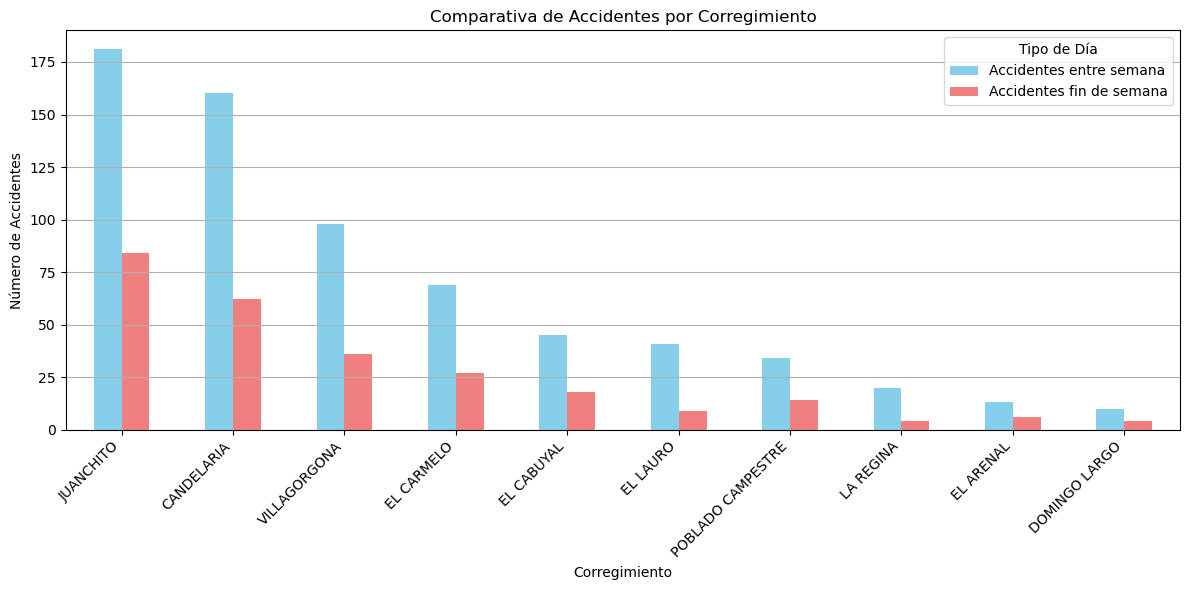

In [31]:
# Gráfico de barras comparativas
comparativa_top[['Accidentes entre semana', 'Accidentes fin de semana']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'lightcoral']
)

plt.title('Comparativa de Accidentes por Corregimiento')
plt.xlabel('Corregimiento')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Día')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


C:\Users\Katerine\AppData\Local\Temp\ipykernel_6980\2729056477.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gravedad_counts.index, y=gravedad_counts.values, palette='Set2')


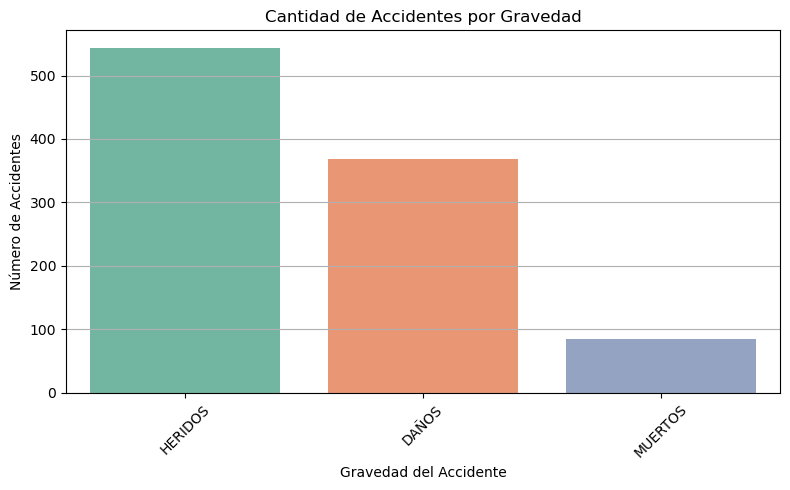

In [33]:
import seaborn as sns

# Conteo de accidentes por gravedad
gravedad_counts = df['GRAVEDAD'].value_counts()

# Gráfica
plt.figure(figsize=(8, 5))
sns.barplot(x=gravedad_counts.index, y=gravedad_counts.values, palette='Set2')

plt.title('Cantidad de Accidentes por Gravedad')
plt.xlabel('Gravedad del Accidente')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Katerine\AppData\Local\Temp\ipykernel_6980\3988450245.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tendencia_mensual = df.resample('M', on='FECHA_DE_OCURRENCIA').size()


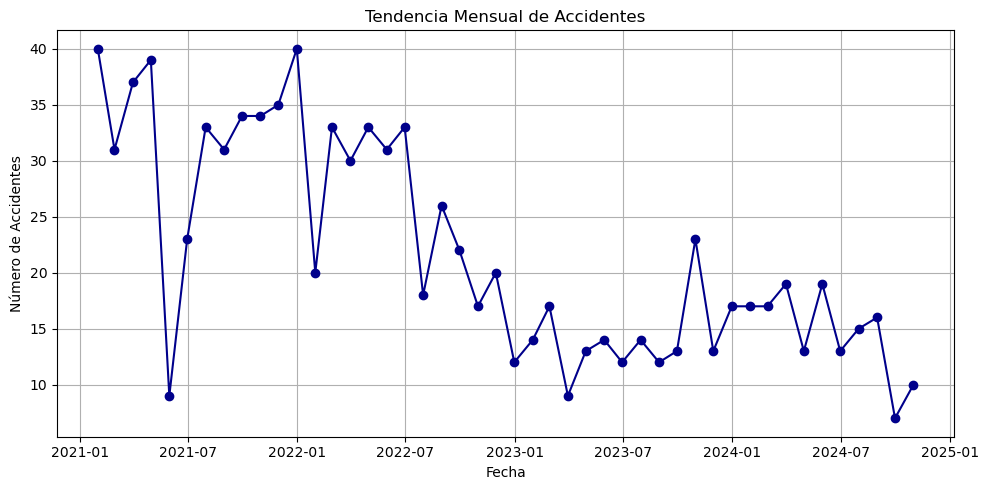

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


df['FECHA_DE_OCURRENCIA'] = pd.to_datetime(df['FECHA_DE_OCURRENCIA'])

# Agrupar por mes y contar accidentes
tendencia_mensual = df.resample('M', on='FECHA_DE_OCURRENCIA').size()

# Gráfica de línea
plt.figure(figsize=(10, 5))
plt.plot(tendencia_mensual.index, tendencia_mensual.values, marker='o', linestyle='-', color='darkblue')

plt.title('Tendencia Mensual de Accidentes')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.tight_layout()
plt.show()
